# Step 5: Extracting Segments

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:

# Load the dataset
df = pd.read_csv('indian_cities_data_disability_only.csv')

In [8]:
# Define a mapping for the 'Usage Frequency' column
usage_frequency_mapping = {
    'Daily': 5,
    'Weekly': 4,
    'Monthly': 3,
    'Rarely': 2,
    'Never': 1
}

In [9]:
# Apply the mapping
df['Usage Frequency'] = df['Usage Frequency'].map(usage_frequency_mapping)


In [10]:
# Ensure there are no missing values in the 'Usage Frequency' column
df['Usage Frequency'].fillna(0, inplace=True)

# Preprocessing
# Convert categorical data to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['City', 'Gender', 'Education', 'Occupation/Job', 'Geophysical Location', 'Tech Level', 'Disability'])

In [12]:
import warnings
warnings.filterwarnings("ignore")


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Determine the optimal number of clusters using the Elbow Method
sse = []
silhouette_scores = []
range_n_clusters = range(2, 15)  # you can adjust this range based on your dataset size

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

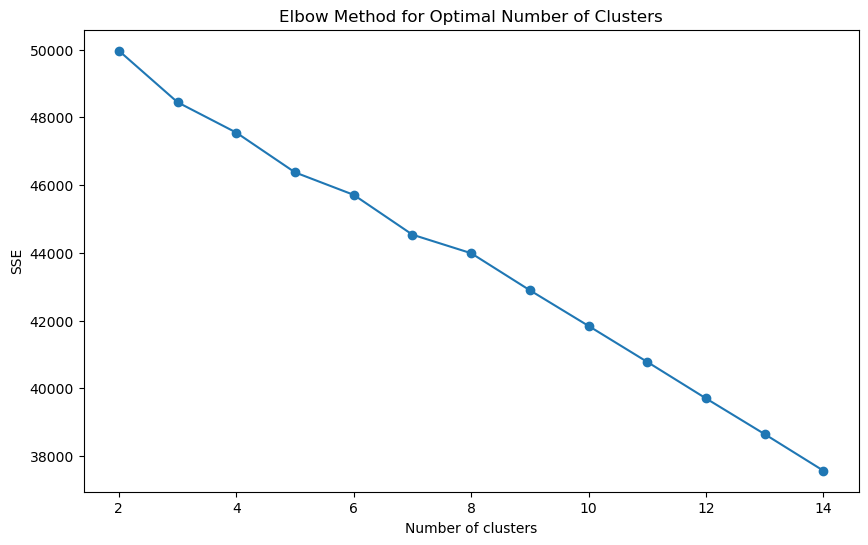

In [13]:
# Plot the SSE for the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

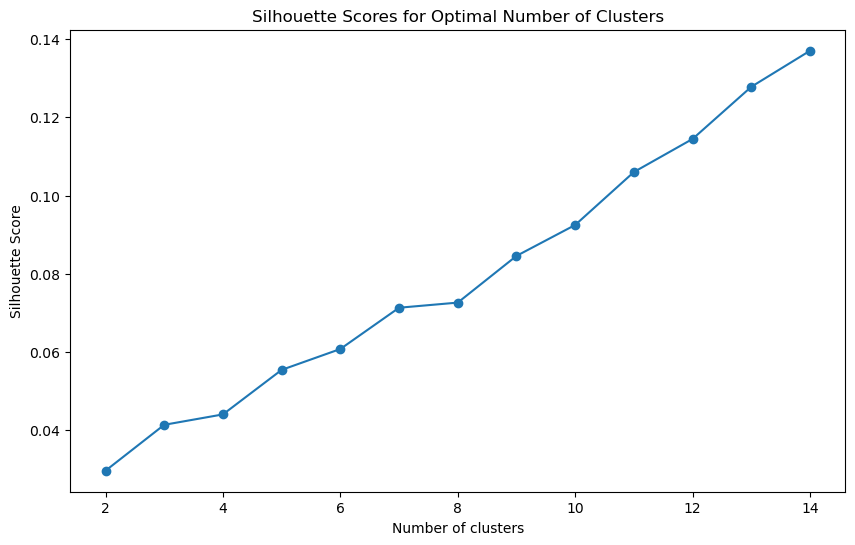

In [14]:
# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.show()

In [15]:
# From the plots, choose the optimal number of clusters (e.g., k=4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Save the clustered data to a new CSV file
df.to_csv('indian_cities_data_disability_only_with_clusters.csv', index=False)

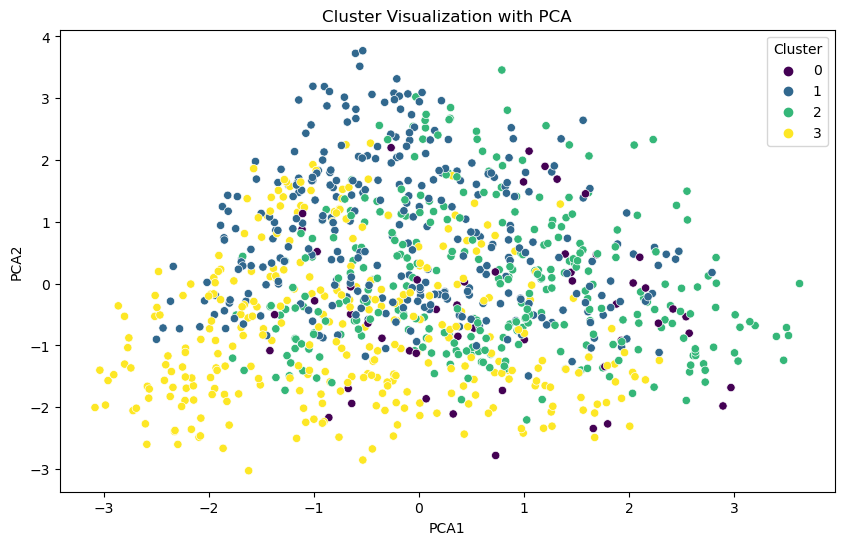

In [16]:
# Visualize the clusters (using PCA for dimensionality reduction to 2D)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Cluster Visualization with PCA')
plt.show()



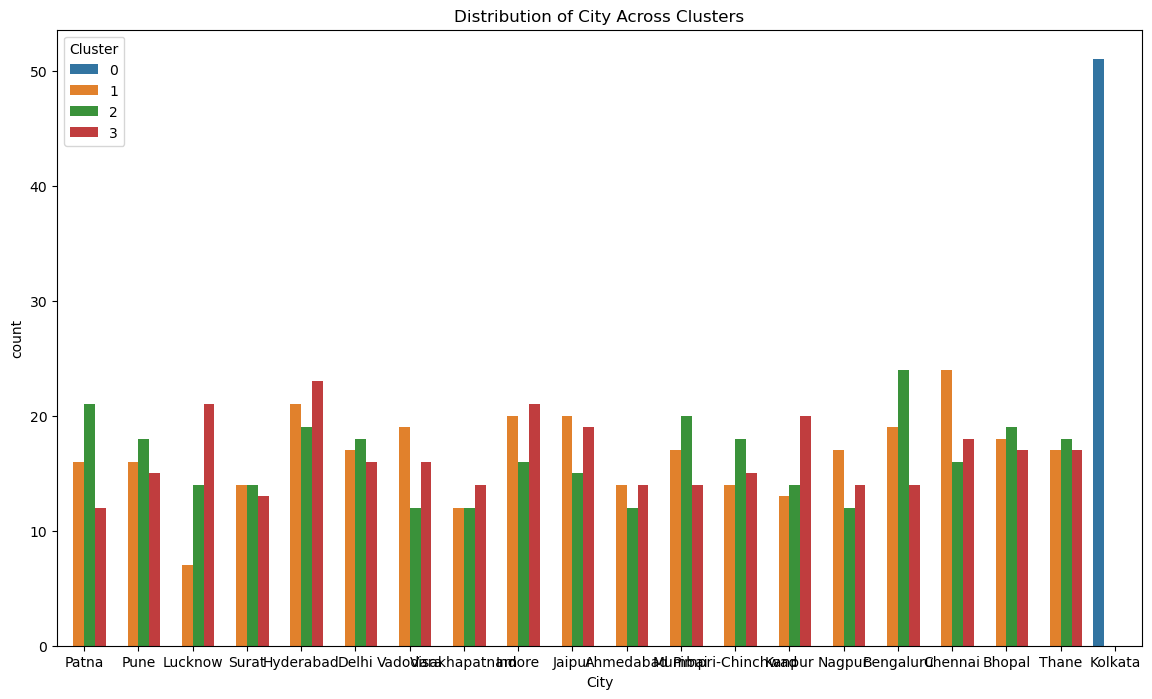

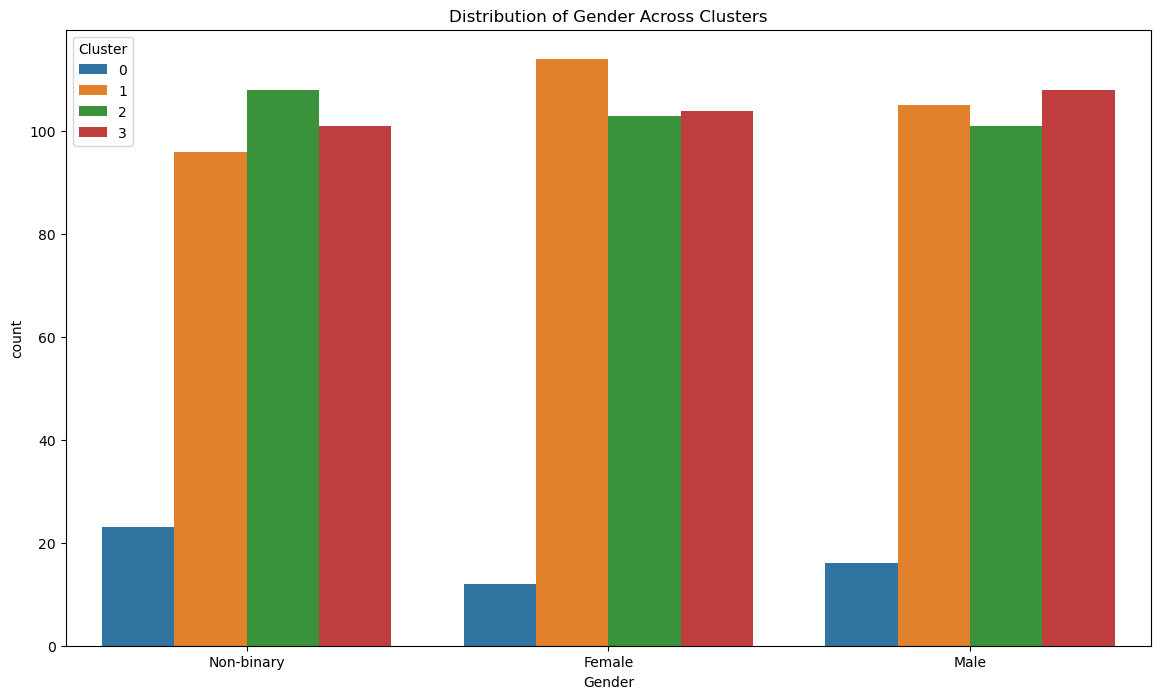

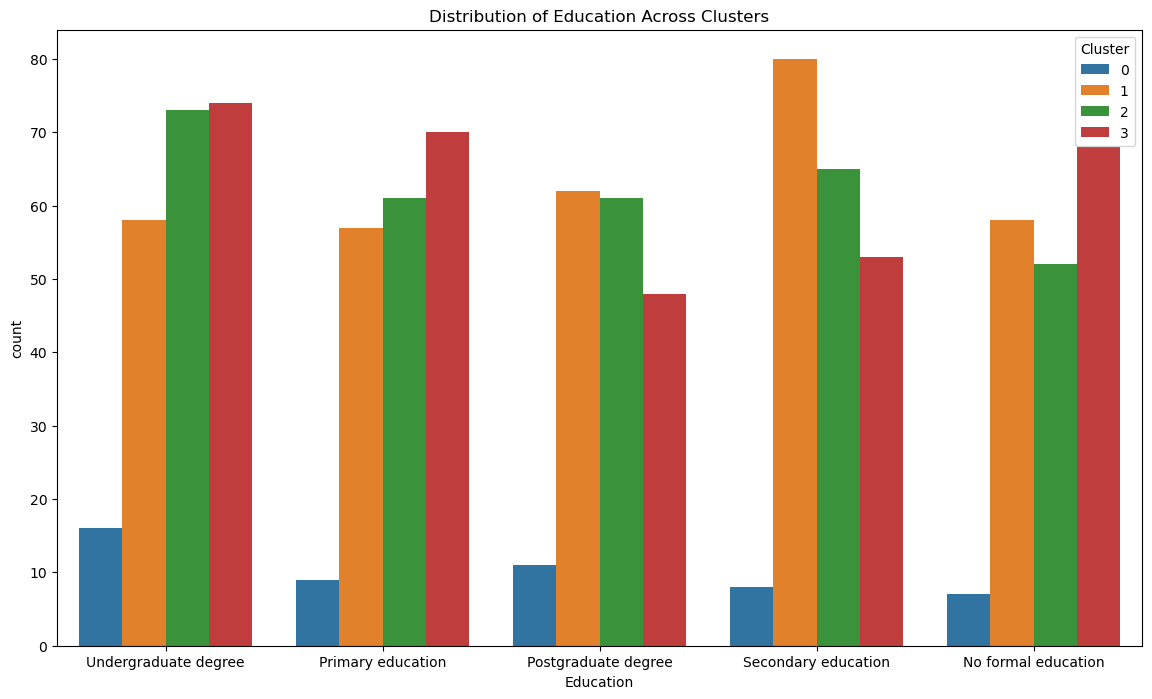

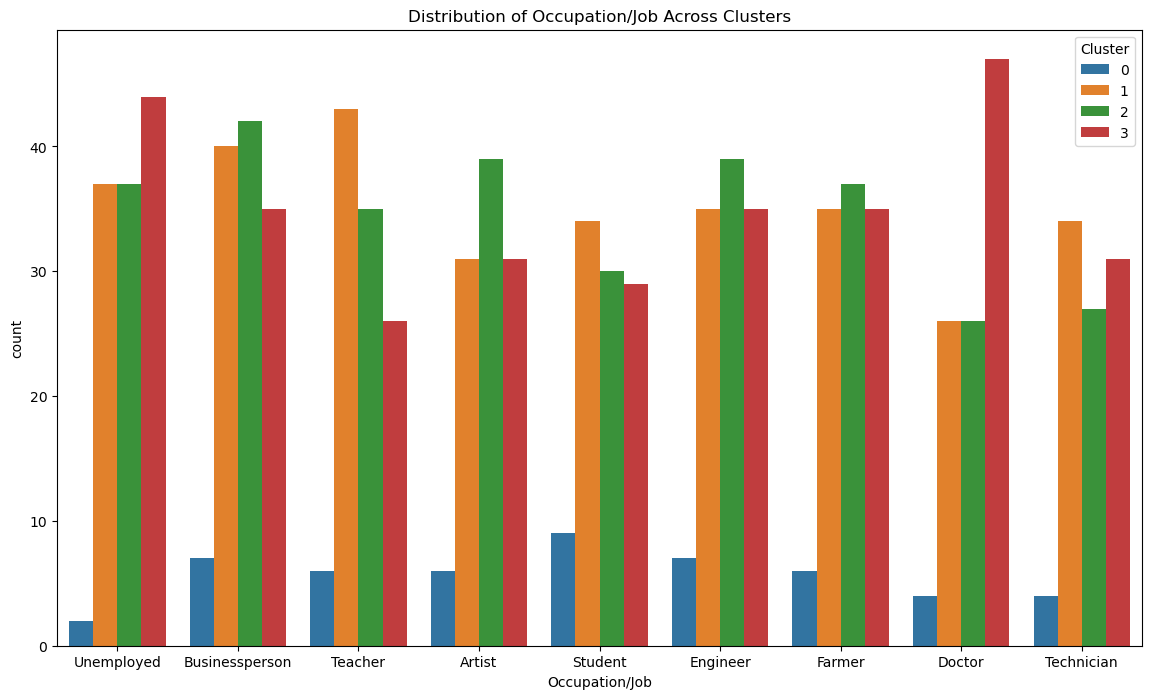

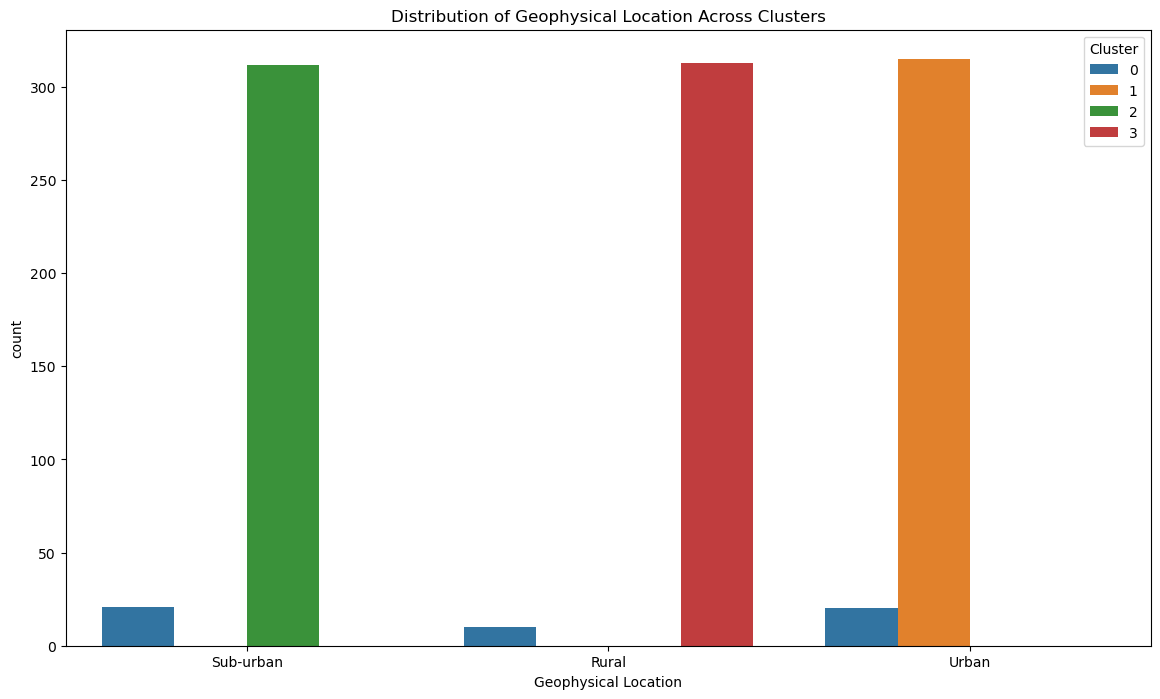

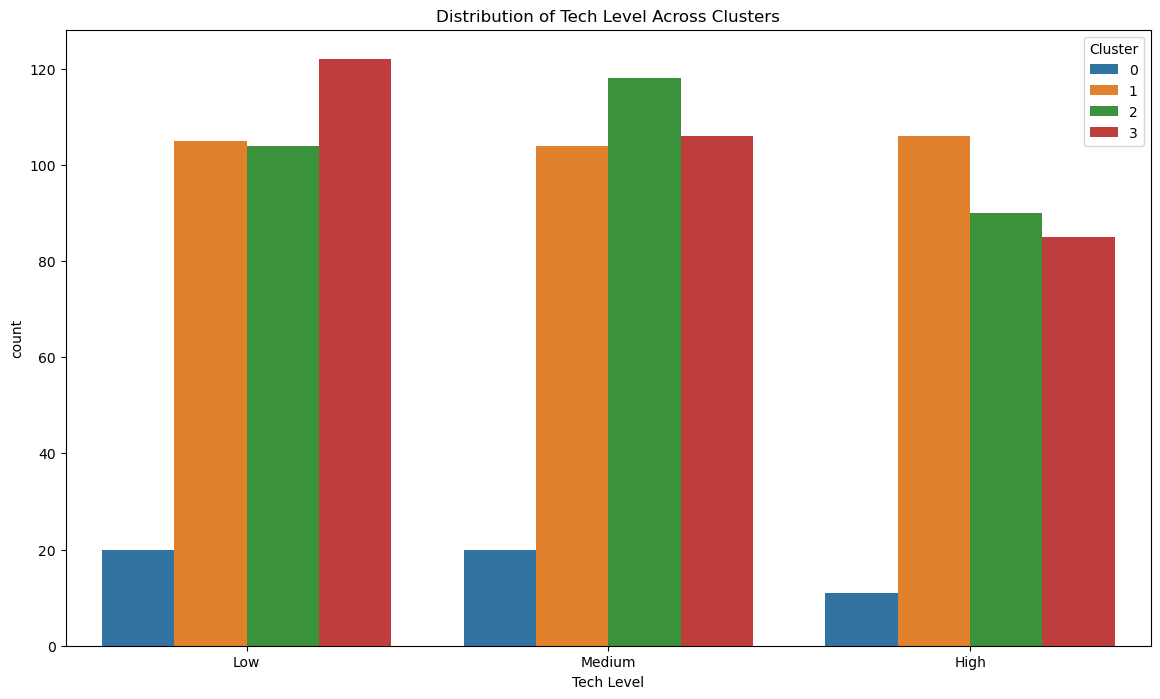

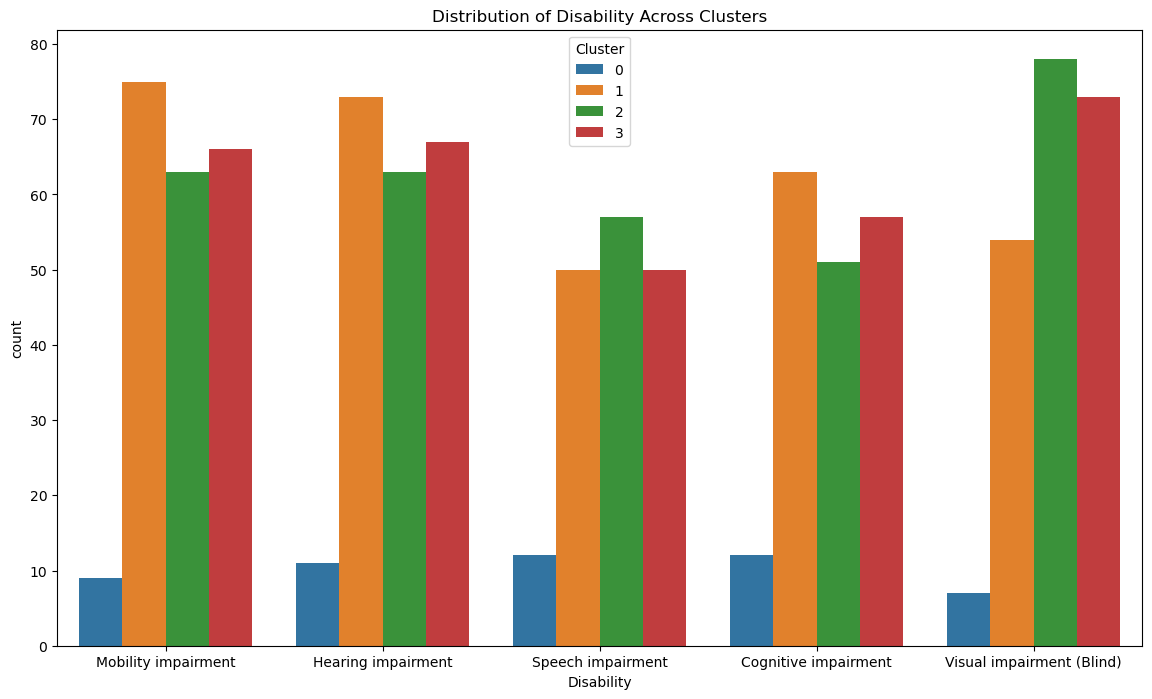

In [17]:
# Visualize Categorical Feature Distributions
categorical_features = ['City', 'Gender', 'Education', 'Occupation/Job', 'Geophysical Location', 'Tech Level', 'Disability']

for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=feature, hue='Cluster', data=df)
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.show()

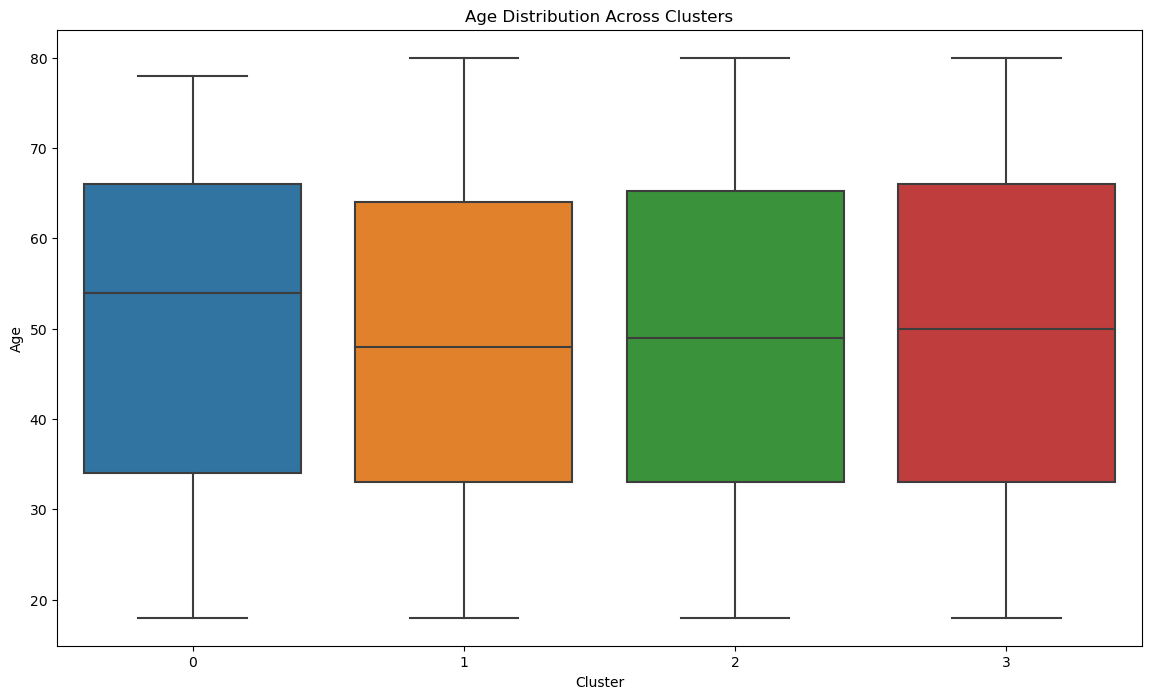

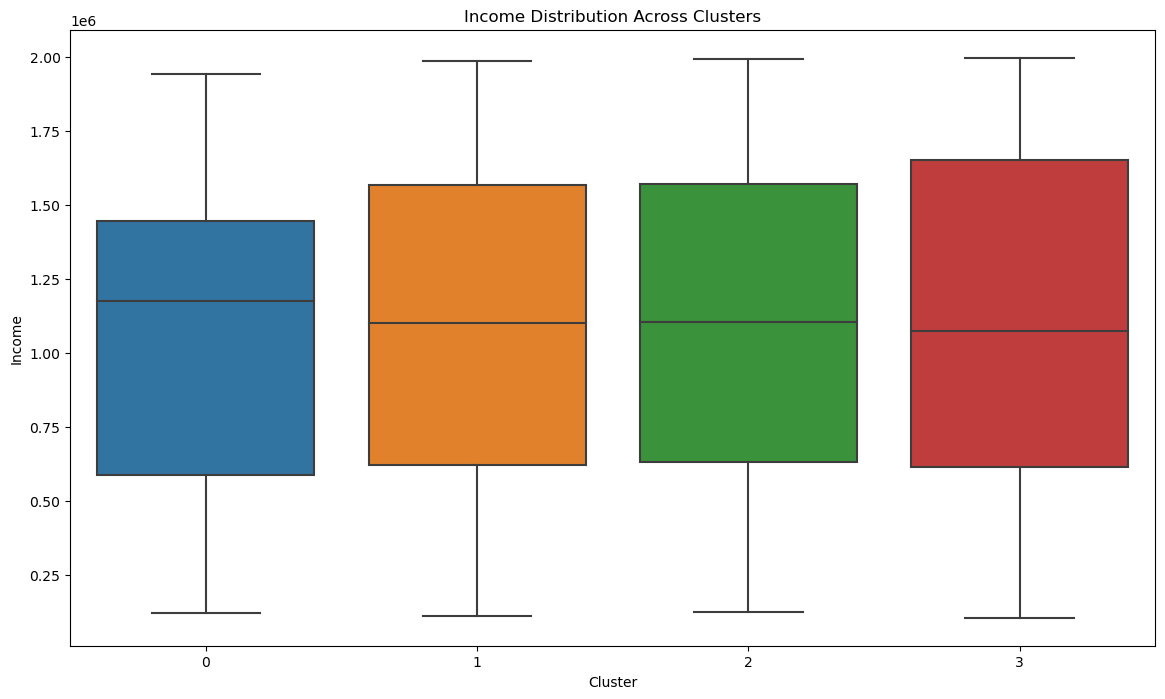

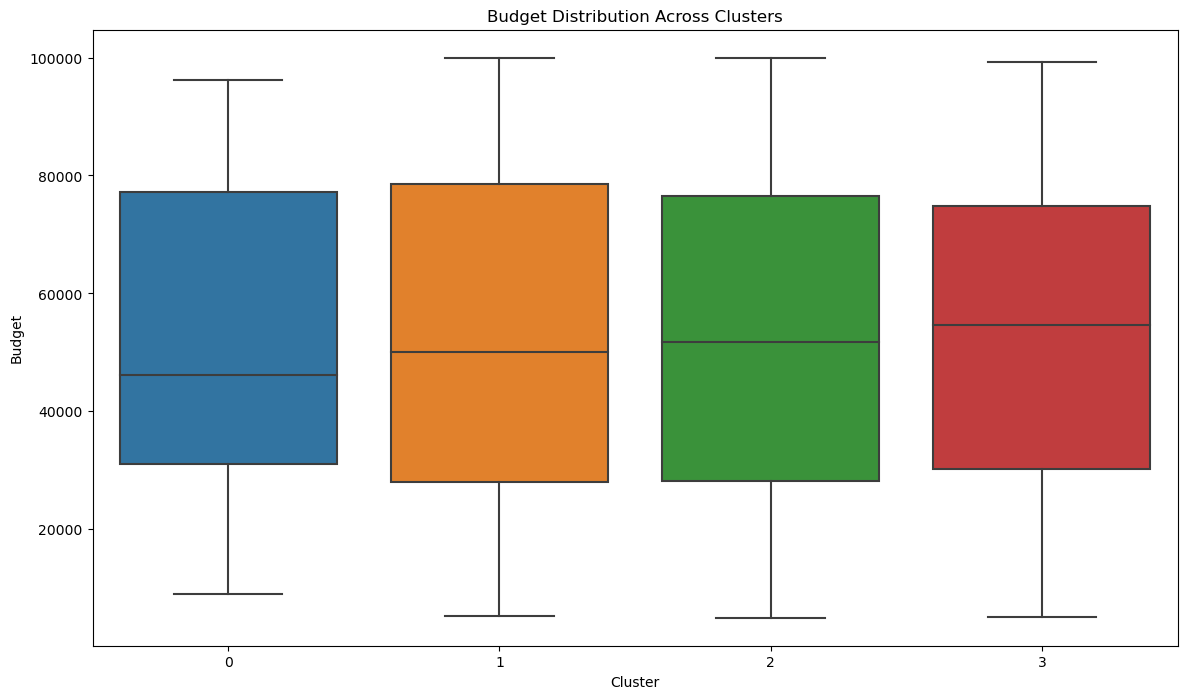

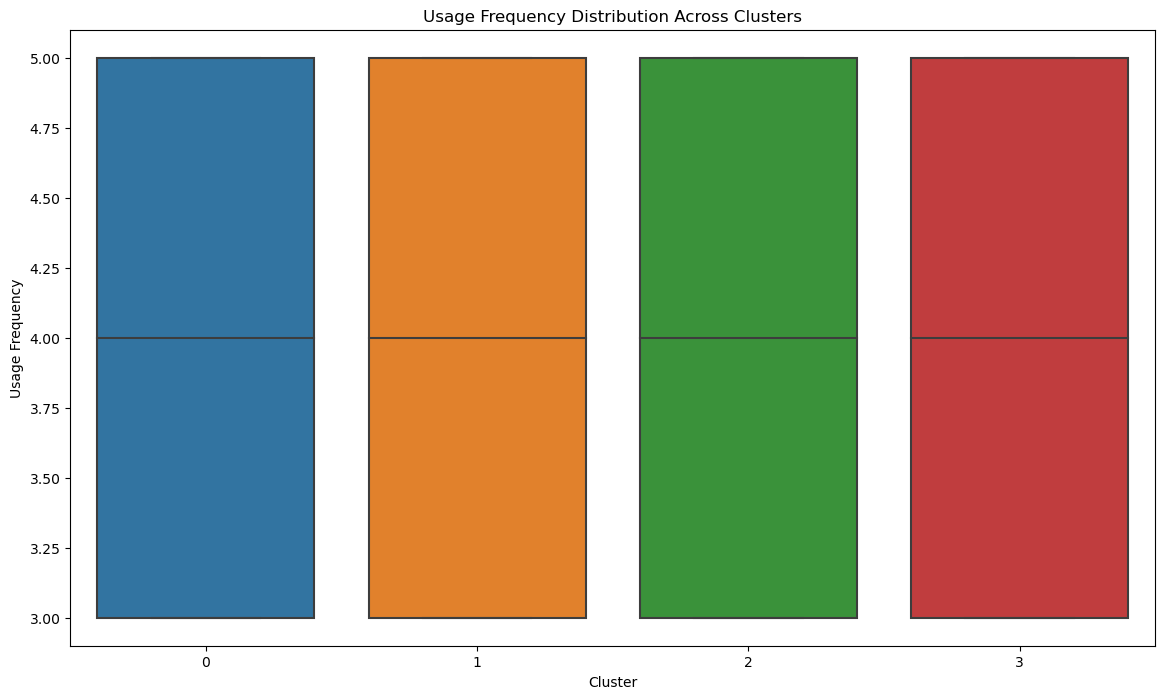

In [18]:
# Visualize Numerical Feature Distributions
numerical_features = ['Age', 'Income', 'Budget', 'Usage Frequency']

for feature in numerical_features:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} Distribution Across Clusters')
    plt.show()

# Step 6: Profiling Segments


In [19]:
# Load the clustered data
df_clustered = pd.read_csv('indian_cities_data_disability_only_with_clusters.csv')

# Define categorical and numerical features
categorical_features = ['City', 'Gender', 'Education', 'Occupation/Job', 'Geophysical Location', 'Tech Level', 'Disability']
numerical_features = ['Age', 'Income', 'Budget', 'Usage Frequency']


In [20]:
# Function to profile segments
def profile_segments(data, cluster_column, categorical_features, numerical_features):
    profiles = {}
    
    for cluster in sorted(data[cluster_column].unique()):
        cluster_data = data[data[cluster_column] == cluster]
        profile = {}
        

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to profile segments
def profile_segments(data, cluster_column, categorical_features, numerical_features):
    profiles = {}
    
    for cluster in sorted(data[cluster_column].unique()):
        cluster_data = data[data[cluster_column] == cluster]  # Define cluster_data within the loop
        profile = {}
        
        # Categorical features
        for feature in categorical_features:
            profile[f'{feature}_mode'] = cluster_data[feature].mode().iloc[0]
            profile[f'{feature}_value_counts'] = cluster_data[feature].value_counts().to_dict()
        
        # Numerical features
        for feature in numerical_features:
            profile[f'{feature}_mean'] = cluster_data[feature].mean()
            profile[f'{feature}_median'] = cluster_data[feature].median()
            profile[f'{feature}_std'] = cluster_data[feature].std()
            profile[f'{feature}_min'] = cluster_data[feature].min()
            profile[f'{feature}_max'] = cluster_data[feature].max()
            profile[f'{feature}_iqr'] = cluster_data[feature].quantile(0.75) - cluster_data[feature].quantile(0.25)
        
        profiles[f'Cluster {cluster}'] = profile
    
    return pd.DataFrame.from_dict(profiles, orient='index')

# Example usage:
# Assuming you have defined df_clustered, categorical_features, and numerical_features

# Generate segment profiles
segment_profiles = profile_segments(df_clustered, 'Cluster', categorical_features, numerical_features)

# Display segment profiles
print("Segment Profiles:")
print(segment_profiles)
print("\n")

 


Segment Profiles:
           City_mode                                  City_value_counts  \
Cluster 0    Kolkata                                    {'Kolkata': 51}   
Cluster 1    Chennai  {'Chennai': 24, 'Hyderabad': 21, 'Jaipur': 20,...   
Cluster 2  Bengaluru  {'Bengaluru': 24, 'Patna': 21, 'Mumbai': 20, '...   
Cluster 3  Hyderabad  {'Hyderabad': 23, 'Lucknow': 21, 'Indore': 21,...   

          Gender_mode                              Gender_value_counts  \
Cluster 0  Non-binary     {'Non-binary': 23, 'Male': 16, 'Female': 12}   
Cluster 1      Female   {'Female': 114, 'Male': 105, 'Non-binary': 96}   
Cluster 2  Non-binary  {'Non-binary': 108, 'Female': 103, 'Male': 101}   
Cluster 3        Male  {'Male': 108, 'Female': 104, 'Non-binary': 101}   

                 Education_mode  \
Cluster 0  Undergraduate degree   
Cluster 1   Secondary education   
Cluster 2  Undergraduate degree   
Cluster 3  Undergraduate degree   

                                      Education_value_count

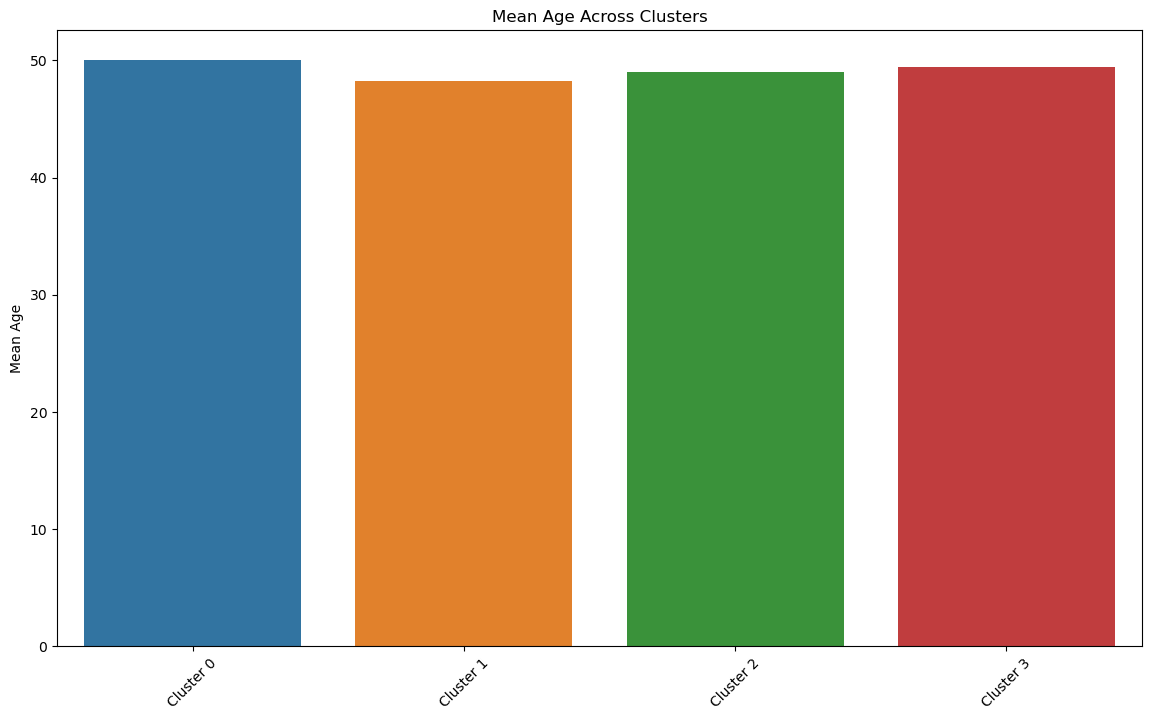

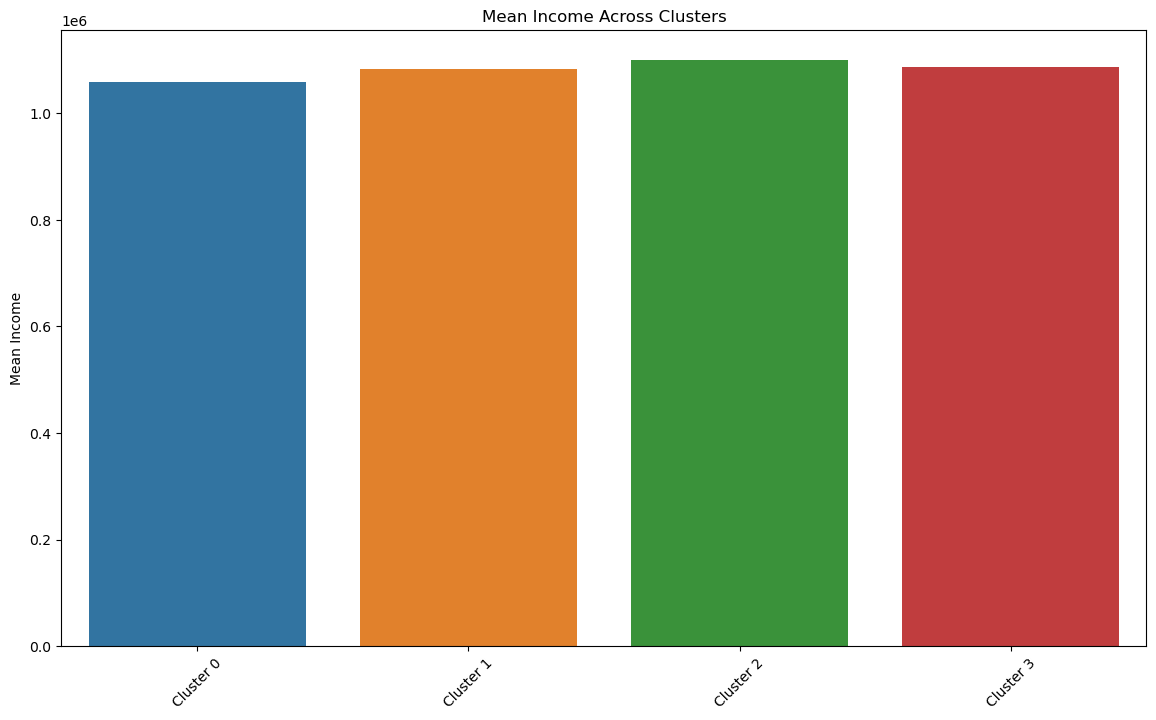

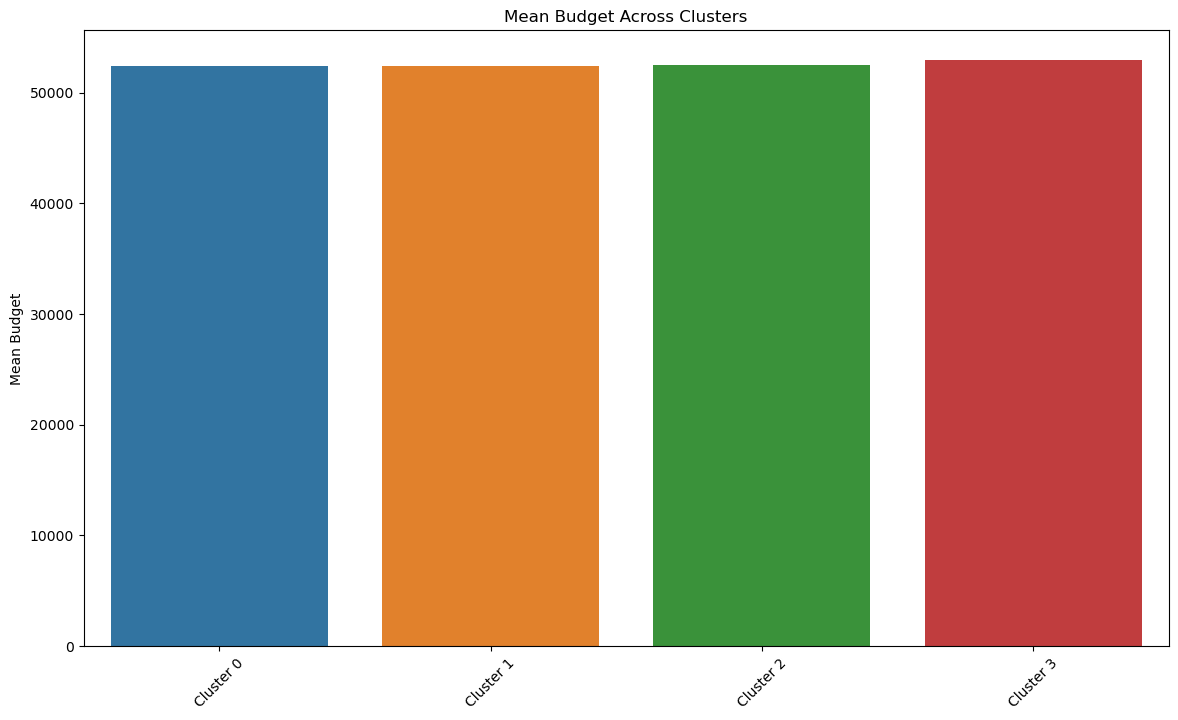

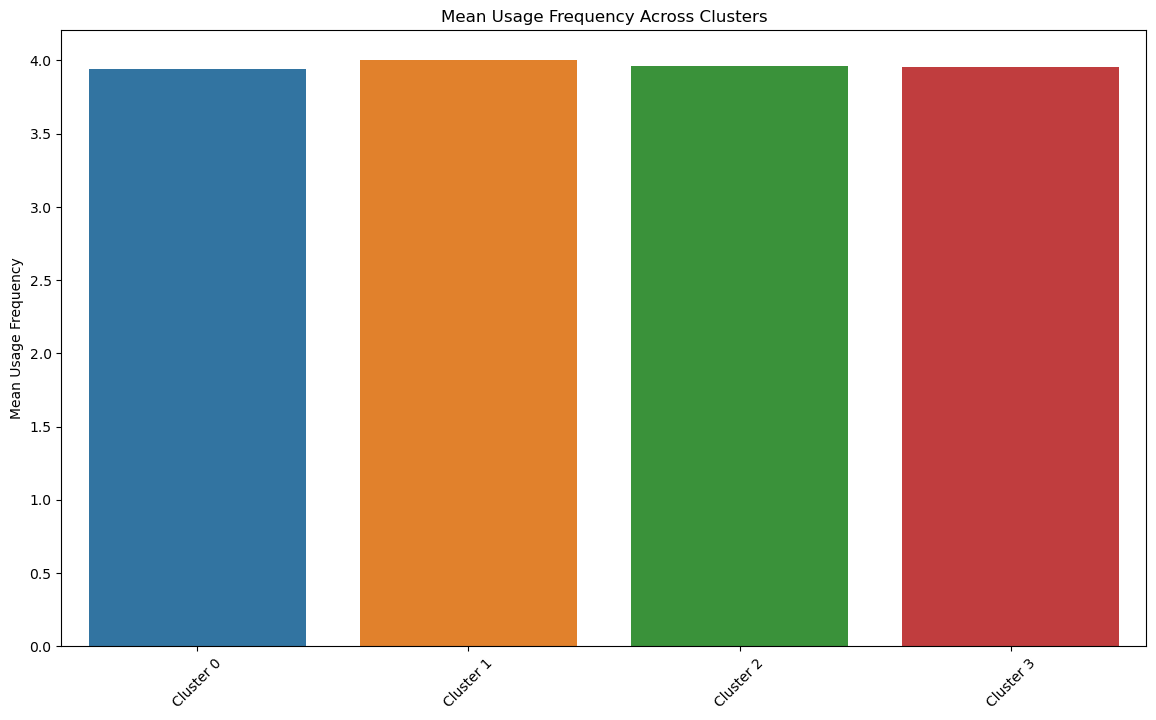

In [36]:
# Visualize segment profiles (bar plots for mean numerical features)
for feature in numerical_features:
    plt.figure(figsize=(14, 8))
    sns.barplot(x=segment_profiles.index, y=f'{feature}_mean', data=segment_profiles)
    plt.title(f'Mean {feature} Across Clusters')
    plt.ylabel(f'Mean {feature}')
    plt.xticks(rotation=45)
    plt.show()

 # Step 7: Describing Segments

In [38]:
# Load the clustered data
df_clustered = pd.read_csv('indian_cities_data_disability_only_with_clusters.csv')

# Function to describe segments
def describe_segments(data, cluster_column, categorical_features, numerical_features):
    segment_descriptions = {}
    
    for cluster in sorted(data[cluster_column].unique()):
        cluster_data = data[data[cluster_column] == cluster]
        description = f"Cluster {cluster}:\n"
        
        # Describe categorical features
        for feature in categorical_features:
            mode_value = cluster_data[feature].mode().iloc[0]
            description += f"  - Most common {feature}: {mode_value}\n"
        
        # Describe numerical features
        description += "  - Numerical summaries:\n"
        for feature in numerical_features:
            mean_value = cluster_data[feature].mean()
            median_value = cluster_data[feature].median()
            min_value = cluster_data[feature].min()
            max_value = cluster_data[feature].max()
            description += f"    - {feature}: Mean={mean_value:.2f}, Median={median_value}, Min={min_value}, Max={max_value}\n"
        
        segment_descriptions[f'Cluster {cluster}'] = description
    
    return segment_descriptions

# Generate segment descriptions
segment_descriptions = describe_segments(df_clustered, 'Cluster', categorical_features, numerical_features)

# Display segment descriptions
for segment, description in segment_descriptions.items():
    print(description)
    print("="*80)  # Separating segments with a line for clarity


Cluster 0:
  - Most common City: Kolkata
  - Most common Gender: Non-binary
  - Most common Education: Undergraduate degree
  - Most common Occupation/Job: Student
  - Most common Geophysical Location: Sub-urban
  - Most common Tech Level: Low
  - Most common Disability: Cognitive impairment
  - Numerical summaries:
    - Age: Mean=50.08, Median=54.0, Min=18, Max=78
    - Income: Mean=1058254.69, Median=1174844.0, Min=119413, Max=1942456
    - Budget: Mean=52397.35, Median=46086.0, Min=8971, Max=96190
    - Usage Frequency: Mean=3.94, Median=4.0, Min=3, Max=5

Cluster 1:
  - Most common City: Chennai
  - Most common Gender: Female
  - Most common Education: Secondary education
  - Most common Occupation/Job: Teacher
  - Most common Geophysical Location: Urban
  - Most common Tech Level: High
  - Most common Disability: Mobility impairment
  - Numerical summaries:
    - Age: Mean=48.27, Median=48.0, Min=18, Max=80
    - Income: Mean=1082492.16, Median=1100377.0, Min=112238, Max=1986709
